In [2]:
import pandas as pd

#Import cleaned Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv')

In [5]:
print(data.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'TotalPercentage', 'pass_or_fail'],
      dtype='object')


#1. Stacked Bar Chart - Pass or Fail by parental level of education

<Figure size 800x600 with 0 Axes>

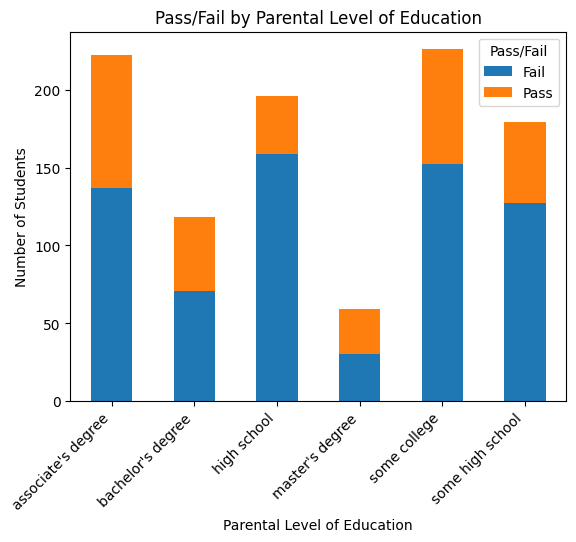

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

cross_tab = pd.crosstab(data['parental level of education'], data['pass_or_fail'])
plt.figure(figsize=(8, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Pass/Fail by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pass/Fail')
plt.show()

#2. Pie Chart - Proportion of Students Passed with Higher Math Score

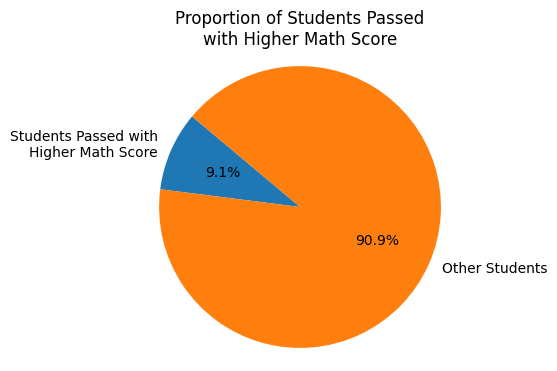

In [12]:
# Filter the data for students who scored higher in math than in reading and writing and passed
passed_higher_math = data[(data['math score'] > data['reading score']) & (data['math score'] > data['writing score']) & (data['pass_or_fail'] == 'Pass')]

num_passed_higher_math = len(passed_higher_math)
num_other_students = len(data) - num_passed_higher_math

labels = ['Students Passed with\nHigher Math Score', 'Other Students']
sizes = [num_passed_higher_math, num_other_students]
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Students Passed\nwith Higher Math Score')
plt.axis('equal')

plt.show()


#3. Bar Chart - Number of Males and Females Who Have Passed

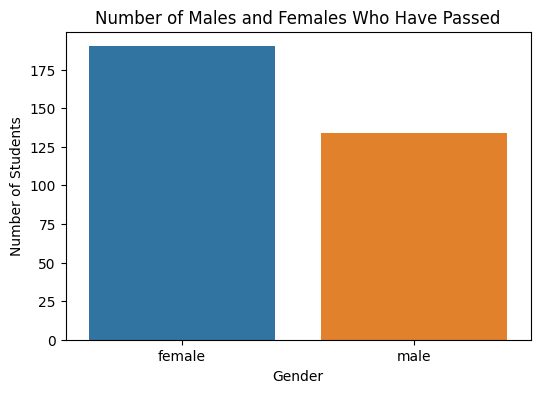

In [15]:
passed_students = data[data['pass_or_fail'] == 'Pass']
pass_count_by_gender = passed_students['gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=pass_count_by_gender.index, y=pass_count_by_gender.values)
plt.title('Number of Males and Females Who Have Passed')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

#4. Histogram - Pass/Fail by Race/Ethnicity

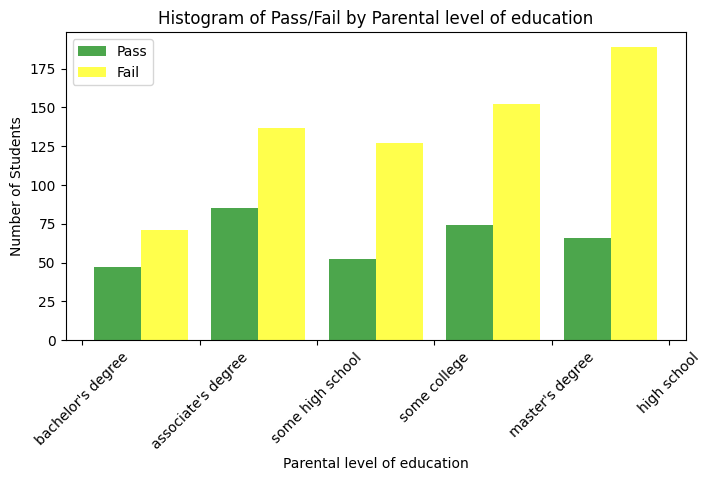

In [29]:
plt.figure(figsize=(8, 4))
plt.hist([data[data['pass_or_fail'] == 'Pass']['parental level of education'], data[data['pass_or_fail'] == 'Fail']['parental level of education']],
         bins=5, alpha=0.7, color=['green', 'yellow'], label=['Pass', 'Fail'])
plt.xlabel('Parental level of education')
plt.ylabel('Number of Students')
plt.title('Histogram of Pass/Fail by Parental level of education')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#5. Scatter Plot - Scatter Plot of Writing Score vs. Total Percentage (Grouped by Gender)

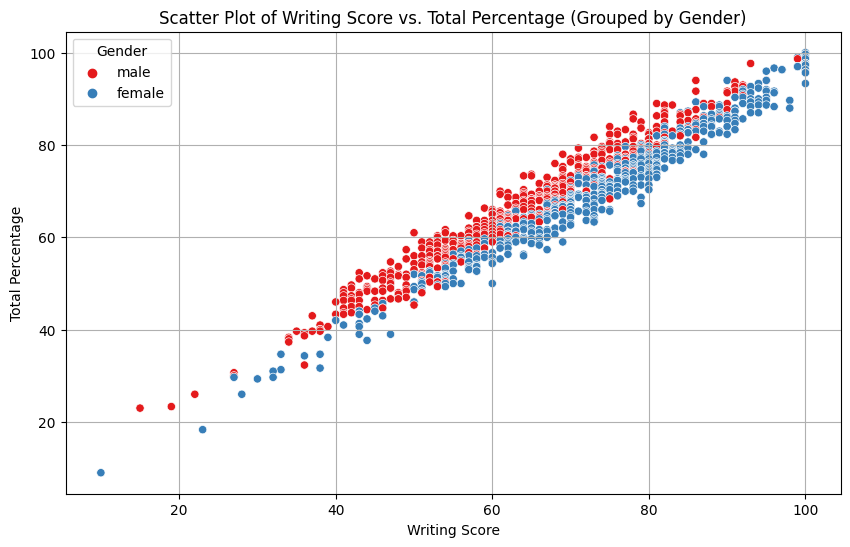

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='writing score', y='TotalPercentage', hue='gender', palette='Set1')
plt.xlabel('Writing Score')
plt.ylabel('Total Percentage')
plt.title('Scatter Plot of Writing Score vs. Total Percentage (Grouped by Gender)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()